In [1]:
#installing nltk 
!pip install nltk

     |████████████████████████████████| 1.5 MB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 18.3 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 8.7 MB/s  eta 0:00:01
     |████████████████████████████████| 749 kB 45.0 MB/s eta 0:00:01


In [2]:
#importing few of the libraries i will need for next steps:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string



In [3]:
#Read the train csv file into dataframe train
train = pd.read_csv("train.csv")


In [4]:
#printing the shape of train
print(train.shape)


(159571, 8)


In [5]:
#printing a few lines of train dataset:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
#Read the train csv file into dataframe train
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(159571, 8)


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In the training dataset, we have a id for each comment an each comment is defined as malignant, highly_malignant, rude, threat, abuse and/or loathe.

In [7]:
#Read the test csv file into dataframe test and prnting shape and few data instances sample
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(153164, 2)


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In our testing set, we have comment id and the comment itself.

Notice that the training data contains 159,571 observations with 8 columns and the test data contains 153,164 observations with 2 columns.

In [8]:
#List the data type of each feature for training and test dataset:
print(train.dtypes)
print(test.dtypes)

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object
id              object
comment_text    object
dtype: object


As we see, the comment id and comment itself are the 2 features whose data type is object. 
The remaining ones, the target columns, are the numerical ones.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Here we can see the training dataset have 159571 cases and a total of 8 columns including the 6 target features which are malignant,highly_malignant,rude,threat,abuse and loathe.

As seen in the non null count, we have that all the features including the 6 target features have no missing values as all the features have equal number of instances as the number of cases o entries which is 159571.

We can also see, as mentioned in the previous code, we have 2 features (not target ones) which are data of type object. And the remaining ones, the target features, are numerical integer type values.

In [9]:
#descriptive quick summary of training dataset:
print('Train data descriptive quick analysis',train.describe())

Train data descriptive quick analysis            malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max      

In [116]:
train.describe()


,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In the training dataset, we see we have target columns as numerical values as seen in the dtyes previously where we can highlight the following:

- there is no missing values as all the columns have same number of instances as the total number of cases.

- checking the mean and median, we can see all the mean are higher than median, which means all the numerical target features have a right skewed distribution.

- when checking the standard distribution, malignant, rude and abuse have higher diviation than other numerical target features.

 - And regarding the maximum, we see a clear preview of outliers.
 

Here you can see and observe that the mean are very small. It give us a hint that maybe some cases has no label of any target categories on it. Let's study the labels and its cases!

In [99]:
# calculating total count of each category comments. Calculating number of comments in each category
counts = []
categories = list(train.columns.values)
for i in categories:
    counts.append((i, train[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'count'])
df_stats

,category,count
0,malignant,15294
1,highly_malignant,1595
2,rude,8449
3,threat,478
4,abuse,7877
5,loathe,1405


As can be seen in the above table, malignant is the only target feature that has the highest number of comments and threat is the target category which has the lowest number of cases of comments.

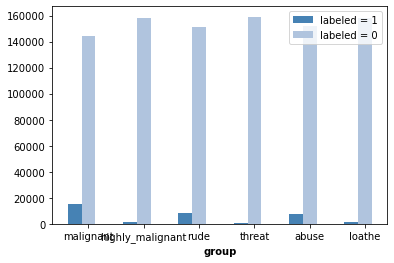

In [3]:
# Code to draw bar graph for visualising distribution of classes within each label.
barWidth = 0.25

bars1 = [sum(train['malignant'] == 1), sum(train['highly_malignant'] == 1), sum(train['rude'] == 1), sum(train['threat'] == 1),
         sum(train['abuse'] == 1), sum(train['loathe'] == 1)]
bars2 = [sum(train['malignant'] == 0), sum(train['highly_malignant'] == 0), sum(train['rude'] == 0), sum(train['threat'] == 0),
         sum(train['abuse'] == 0), sum(train['loathe'] == 0)]
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='steelblue', width=barWidth, label='labeled = 1')
plt.bar(r2, bars2, color='lightsteelblue', width=barWidth, label='labeled = 0')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse',
                                                       'loathe'])
plt.legend()
plt.show()

In the above plot, at first sight we can notice we have way more cases of non labelled cases than labelled cases.

And when checking and doing the unique categorization of each comment, we see the malignant, highly malignant and abuse have more comments than rude, abuse and loathe.

<AxesSubplot:xlabel='comment_text'>

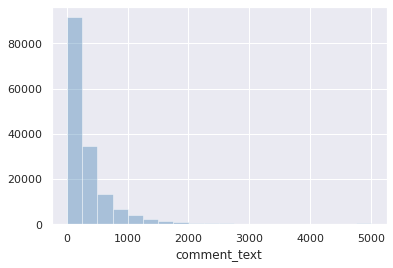

In [118]:
#Below is a plot showing the comment length frequency. As noticed, most of the comments are short with only a few comments longer than 1000 words.
sns.set(color_codes=True)
comment_len = train.comment_text.str.len()
sns.distplot(comment_len, kde=False, bins=20, color="steelblue")

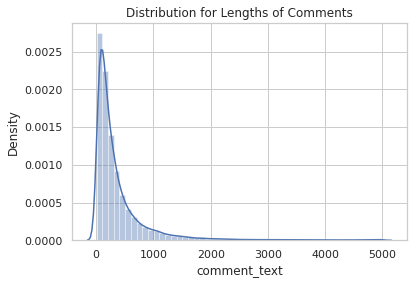

In [102]:
lens = train.comment_text.str.len()
sns.distplot(lens)
plt.title("Distribution for Lengths of Comments")
plt.show()

Most of the comment text length are within 1500 characters, with some up to 5,000 characters long.

In [10]:
#descriptive quick summary of testing dataset:
print('Test data descriptive quick analysis',test.describe())

Test data descriptive quick analysis                       id                                       comment_text
count             153164                                             153164
unique            153164                                             153164
top     00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
freq                   1                                                  1


As both features of testing set are object type fetaures, we have neither mean, std, medium nor maximum. 

Here all we can highlight is that we have no missing  values and the top comment that appears the most is comment id 00001cee341fdb12  which is Yo bitch Ja Rule is more succesful then you'll...

In [11]:
# checking null values
print(train.isnull().sum())

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64


AxesSubplot(0.125,0.125;0.62x0.755)


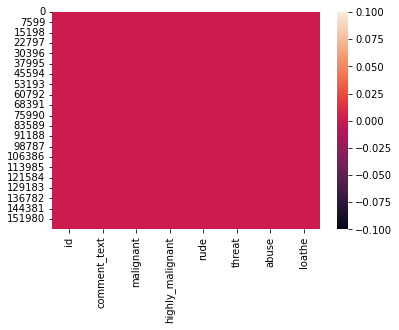

In [12]:
# checking null values through heatmap
print(sns.heatmap(train.isnull()))

As we said, nomissing values found in the training dataset.

Next, let's examine the correlations among the target variables.

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


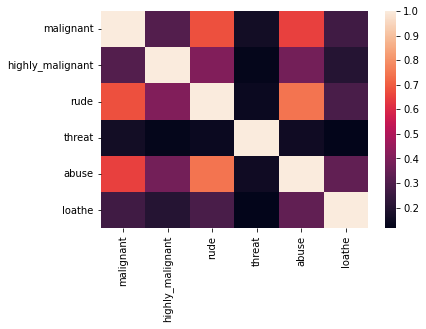

In [13]:
## checking correlation in dataset
print(train.corr())
print(sns.heatmap(train.corr()))

<AxesSubplot:>

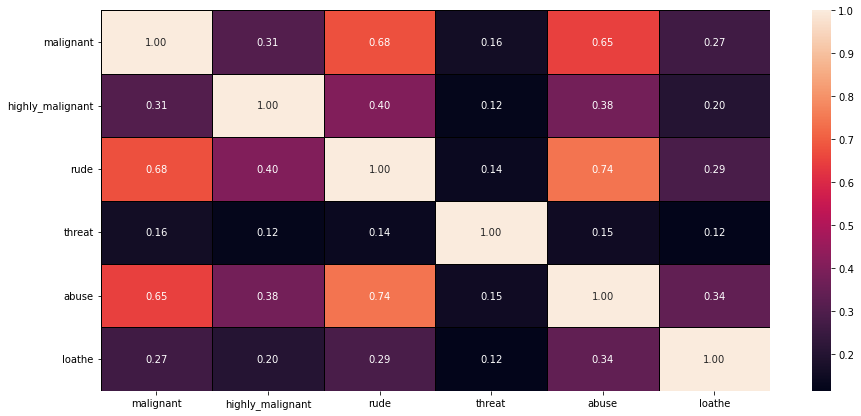

In [14]:
#Correlation using heatmap:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

As seen in the correlation matrix, there is a high chance of 
- rude comments to be abusing and malignant.
- malignant to be rude and abusing.
- abuse comment to be rude and malignant.

We can also highlight that the least correlated target feature with others is threat category.

Let's check skewnwss of the target numerical features.

In [15]:
# checking the skewness for the features:
train.skew()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

We see high skewness in our data. So, we need to apply some transformation techique in order to reduce the skewness the data. We will apply it later.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


malignant


0    144277
1     15294
Name: malignant, dtype: int64


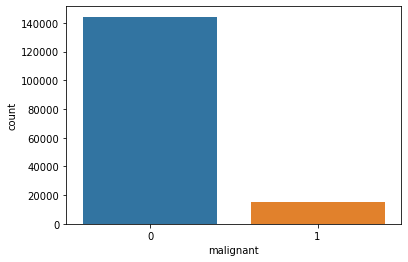

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


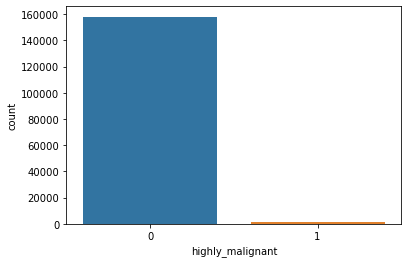

loathe


0    158166
1      1405
Name: loathe, dtype: int64


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


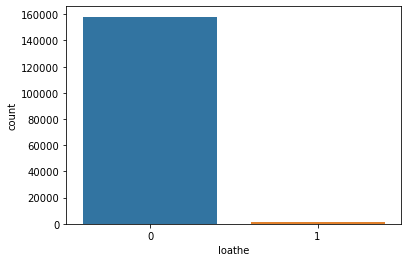

rude


0    151122
1      8449
Name: rude, dtype: int64


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


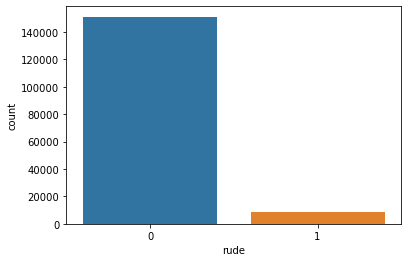

abuse


0    151694
1      7877
Name: abuse, dtype: int64


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


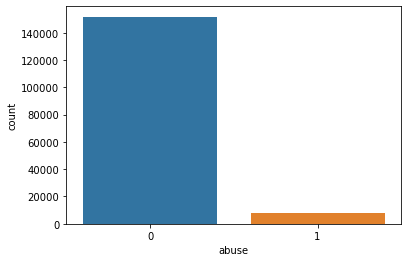

threat


0    159093
1       478
Name: threat, dtype: int64


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


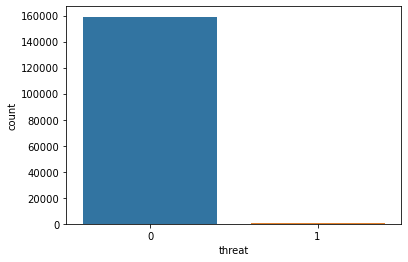

In [16]:
#plotting the count values for each target feature:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()

As we said, we have way more cases of unlabelled comments than comments that have at least one category defined.

So let's check the comments proportion that we have as unlabelled comments:

In [145]:
unlabelled_in_all = train_df[(train_df['malignant']!=1) & (train_df['highly_malignant']!=1) & (train_df['rude']!=1) & 
                            (train_df['threat']!=1) & (train_df['abuse']!=1) & (train_df['loathe']!=1)]
print('Percentage of unlabelled comments is ', len(unlabelled_in_all)/len(train_df)*100)

Percentage of unlabelled comments is  89.83211235124176


In [146]:
# check for any 'null' comment
no_comment = train_df[train_df['comment_text'].isnull()]
len(no_comment)

0

No missing comments.

In [17]:
df=train

Now let's check that frequency of occurence of multilabelled data. For that, we need to balance and equilibrized the common dtype of all features:

In [18]:
#Convert the comment feature to a NumPy array: 
cmt = df['comment_text']
print(cmt.head())

cmt=cmt.to_numpy() 

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object


In [19]:
#Convert the target features to a NumPy array establizing the common dtype to all corresponding features. 
lbl = df[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']]
print(lbl.head())
lbl = lbl.to_numpy()

   malignant  highly_malignant  rude  threat  abuse  loathe
0          0                 0     0       0      0       0
1          0                 0     0       0      0       0
2          0                 0     0       0      0       0
3          0                 0     0       0      0       0
4          0                 0     0       0      0       0


checking frequency of occurence of multilabelled data
  - ct1 counts samples having atleast one label
  - ct2 counts samples having 2 or more than 2 labels
  - ct3 counts samples having 3 or more than 3 labels
  - ct4 counts samples having 4 or more than 4 labels
  - ct5 counts samples having 5 or more than 5 labels
  - ct6 counts samples having 6 or more than 6 labels
  - ct7 counts samples having 7 or more than 7 labels
  - ct8 counts samples having 8 or more than 8 labels


In [20]:
ct1,ct2,ct3,ct4,ct5,ct6,ct7,ct8 = 0,0,0,0,0,0,0,0
for i in range(lbl.shape[0]):
    ct = np.count_nonzero(lbl[i])
    if ct :
        ct1 = ct1+1
    if ct>1 :
        ct2 = ct2+1
    if ct>2 :
        ct3 = ct3+1
    if ct>3 :
        ct4 = ct4+1
    if ct>4 :
        ct5 = ct5+1
    if ct>5 :
        ct6 = ct6+1
    if ct>6 :
        ct7 = ct7+1
    if ct>7 :
        ct8 = ct8+1
print(ct1)
print(ct2)
print(ct3)
print(ct4)
print(ct5)
print(ct6)
print(ct7)
print(ct8)

16225
9865
6385
2176
416
31
0
0


Here we can say that the highest number of comments is for the group that has only one unique label.

And when checking the least number of comments, we can see having 6 categories labels.

In [21]:
#checking the length of each feature:
train['length_comments'] = train['comment_text'].str.len() #no olvides
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length_comments
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [22]:
#printing the maximum and the average length of feature comments:
print(train['length_comments'].max())
train['length_comments'].mean()

5000


394.138847284281

In [23]:
#which should match with:
x = [len(cmt[i]) for i in range(cmt.shape[0])]
sum(x)/len(x)

394.138847284281

In [24]:
#length of comment for example 159570
len(cmt[159570])

189

average length of comment: 394.139


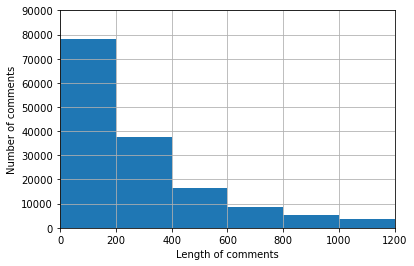

In [25]:
# average length of feature comments and number of comments for each length of bin of comments:
x = [len(cmt[i]) for i in range(cmt.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()    

As we commented in the previous distribution plots, here we can see the that length of comments are more likely to be between 0 and 1200 as we mentioned previously.

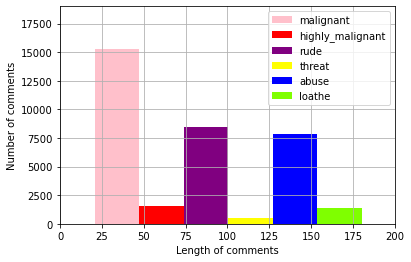

In [26]:
#number of comments for each length of comments:
z = np.zeros(lbl.shape)
for xx in range(cmt.shape[0]):
    l = len(cmt[xx])
    if lbl[xx][0] :
        z[xx][0] = l
    if lbl[xx][1] :
        z[xx][1] = l
    if lbl[xx][2] :
        z[xx][2] = l
    if lbl[xx][3] :
        z[xx][3] = l
    if lbl[xx][4] :
        z[xx][4] = l
    if lbl[xx][5] :
        z[xx][5] = l

labelsplt = ['malignant','highly_malignant','rude', 'threat', 'abuse','loathe'] 
color = ['pink','red','purple','yellow','blue','chartreuse']        
plt.hist(lbl,bins = bins,label = labelsplt,color = color)
plt.axis([0, 200, 0, 19000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#comments below

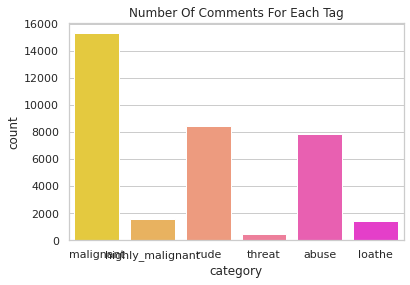

In [104]:
# df_toxic.sum().plot(kind="bar")

sns.set(style="whitegrid")
sns.barplot(x='category', y='count', data=df_stats, palette="spring_r")
plt.title("Number Of Comments For Each Tag")
plt.show()

In [ ]:
#comments below

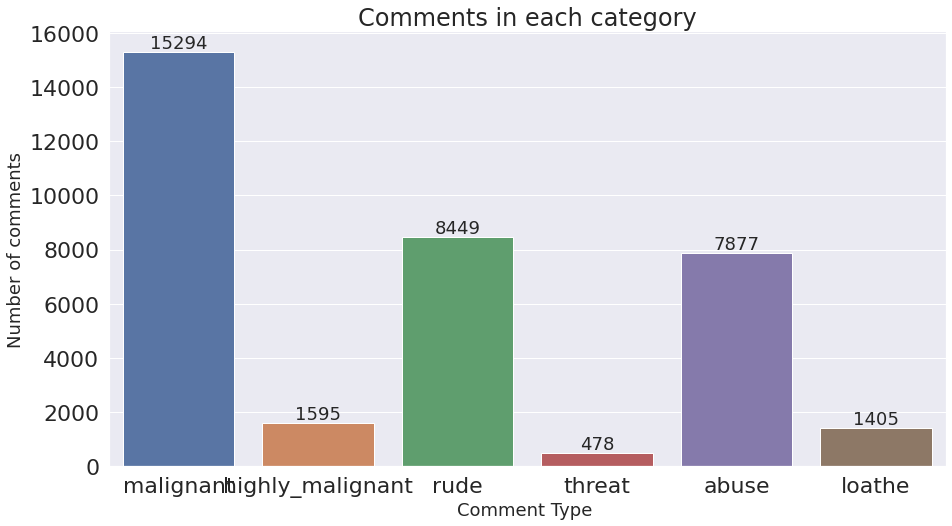

In [171]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

In the bove 3 plots, we could see that malignant, rude and abuse are the 3 categories having the highest number of comments.


And high_malignant, threat and loathe are the 3 categories with lowest number of comments cases.

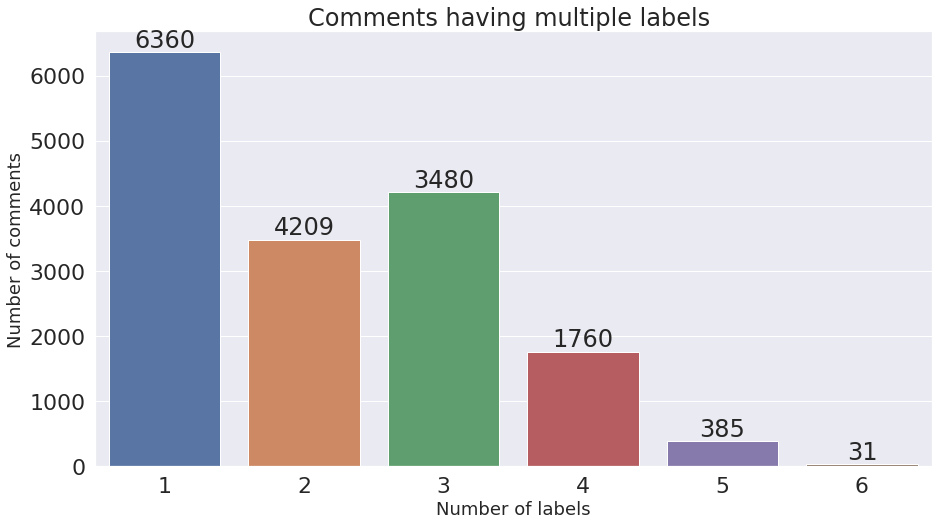

In [172]:
#1.3. Calculating number of comments having multiple labels
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In the above plot, we can see the highest number of comments is for the group that has only one unique label.

And the second place goes to having 3 labels at the same time as the second highest number of comments.

And when checking the least number of comments, we can see having 6 categories labels.

Let's now remove comments with higher words as some very large length comments can be seen in our dataset and these can create serious issue in the training dataset, causing training time to increase and accuracy to decrease. Hence, a threshold of 500 characters will be created and only comments which have length smaller than 500 will be used further.

In [27]:
comments = []  #we will try reduce our dataset by comment length value 500, which means only comments with length smaller than 500 will be used further:
labels = []

for x in range(cmt.shape[0]):
    if len(cmt[x])<=500:
        comments.append(cmt[x])
        labels.append(lbl[x])

In [28]:
labels = np.asarray(labels) #converting in array

In [29]:
print(len(comments)) #comment feature total row length

125615


In [30]:
print(len(labels)) #double-checking

125615


Hence, after removing comments longer than 400 characters, we are still left with more than 125k comments, which seems enough for training purposes.

Feature-engineering
Before fitting models, we need to break down the sentence into unique words by tokenizing the comments. In the tokenize() function, we remove punctuations and special characters. We also filtered out non-ascii characters after observing the results of feature engineering. We then lemmatize the comments and filter out comments with length below 3. Besides lemmatization, we also tried stemming but did not get a better result.

The text preprocessing techniques followed before processing the text data are:
For Preprocessing
- we have the following steps:

Removing Punctuations and other special characters. All the punctuation marks in every comment
are removed.
Splitting the comments into individual words
Removing Stop Words
Stemming and Lemmatising. Lemmatisation:Inflected forms ofwordswhichmay be different verb forms
or sigular/plural forms etc. are called lemma. For ex. go and gone are inflected forms or lemma of the word, gone. The process of grouping these
lemma together is called Lemmatisation. So, Lemmatisation is performed
for every comment.
Applying Count Vectoriser
Splitting dataset into Training and Testing
Preparing a string containing all punctuations to be removed. The string library contains punctuation characters. This is imported and all numbers are appended to this string. Also, we can notice that our comment_text field contains strings such as won't, didn't, etc which contain apostrophe character('). To prevent these words from being converted to wont/didnt, the character ' represented as \' in escape sequence notation is replaced by empty character in the punctuation string. 

RemovalofStopwords:Frequently occurring commonwordslike articles,
prepositions etc. are called stopwords. So, stopwords are removed for each
comment.

maketrans() returns a translation table that maps each character in the punctuation_edit into the character at the same position in the outtab string i.e. it replaces every character in the removal list with a space, since outtab contains a string with spaces.

In [31]:
# Convert all comments to lower case
train['comment_text'] = train['comment_text'].str.lower()

    
# Replace numbers of different types with 'number'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'telephonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'telephonenumber')

# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'email')


# Replace URLs with 'website'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'website')

# Replace money symbols with 'moneysynbols' 
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'moneysynbols')
    


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.


In [32]:
import re #importing regular expression operations

In [33]:
#email-id and website imputation:
train['comment_text'] = train['comment_text'].apply(lambda x: re.sub('b[w.]+?@w+?.w{2,4}b', 'email',x))
#url
train['comment_text'] = train['comment_text'].apply(lambda x:re.sub('(http[s]?S+)|(w+.[A-Za-z]{2,4}S*)', 'website', x))



In [34]:
#adding 10 digits to the actual string punctuation:
import string 
print(string.punctuation)
punctuation_editing = string.punctuation.replace('\'','') +"0123456789"
print (punctuation_editing)
output = "                                         "
trans = str.maketrans(punctuation_editing, output)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [35]:
import nltk #from nltk library importing stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
#importing stopwords
from nltk.corpus import stopwords

Updating the list of stop words

Stop words are those words that are frequently used in both written and verbal communication and do not have either any impact on our training machine.E.g. is, this, us,etc.
Hence can be directly removed. Hence letters 'u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure, will be added to the list of stop words imported directly.

In [37]:
#string punstuation and stopword setting:
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    unit for unit in x.split() if unit not in punctuation_editing))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
stop_words.add('subject')
stop_words.add('http')
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    unit for unit in x.split() if unit not in stop_words))


In [38]:
#define function remove_stopords:
def remove_stopwords(lines):
    return " ".join([wrd for wrd in str(lines).split() if wrd not in stop_words])
train['comment_text']  = train['comment_text'] .apply(lambda x: remove_stopwords(x))

Now the comment text will be smaller because all stopwords will be removed.

In [39]:
#strip and remove punctuation from a string
import re
train['comment_text'] = train['comment_text'].apply(lambda z: re.sub('[%s]' % re.escape(string.punctuation), '' , z))

In [40]:
##remove words and digits #https://www.analyticsvidhya.com/blog/2021/06/must-known-techniques-for-text-preprocessing-in-nlp/
train['comment_text'] = train['comment_text'].apply(lambda x: re.sub('W*dw*','',x))

sys.getrecursionlimit() method is used to find the current recursion limit of the interpreter or to find the maximum depth of the Python interpreter stack. This limit prevents any program from getting into infinite recursion, Otherwise infinite recursion will lead to overflow of the C stack and crash the Python.

In [41]:
import sys
print(sys.getrecursionlimit())

3000


In [42]:
sys.setrecursionlimit(40000) #setting recursion limit

Stemming and Lemmatizing

Stemming is the process of converting inflected/derived words to their word stem or the root form. Basically, a large number of similar origin words are converted to the same word.E.g. words like "stems", "stemmer", "stemming", "stemmed" as based on "stem". This helps in achieving the training process with a better accuracy.

Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item. This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, such as neighboring sentences or even an entire document.

Stemming just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. Sometimes, the same word can have multiple different Lemmas

The wordnet library in nltk will be used for this purpose. Stemmer and Lemmatizer are also imported from nltk.

In [43]:
#Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
'''def stem_words(text):
    while True:
        return ' '.join([stemmer.stem(word) for word in text.split()])
train['comment_text'] = train['comment_text'].apply(lambda x: stem_words(x))'''

train['comment_text'] = train['comment_text'].apply(lambda lines: ' '.join([stemmer.stem(wrd) for wrd in lines.split()]))

In [44]:
import nltk #importing nltk and downloading wordnet
nltk.download('wordnet') 

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [45]:
import nltk #importing nltk and downloading omw 1.4
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [46]:
#appling the function lemmatize_words on the comment text feature
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def lemmatize_words(lines):
    return " ".join([lemmatizer.lemmatize(wrd) for wrd in lines.split()])
train['comment_text'] = train['comment_text'].apply(lambda text: lemmatize_words(text))

'''#applying lemmatizer:
lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))'''

"#applying lemmatizer:\nlem=WordNetLemmatizer()\ntrain['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(\n lem.lemmatize(t) for t in x.split()))"

In [47]:
!pip install stop_words #installing stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32916 sha256=ac19f3f2b097db65566bdaf376dca71c5eb3e1d8cdfcce54c002c357522195b0
  Stored in directory: /home/jovyan/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [48]:
#applying stopword for last time
from stop_words import get_stop_words
stop_words = get_stop_words('english')
stop_words.append('')

for x in range(ord('b'), ord('z')+1):
    stop_words.append(chr(x))

In [49]:
print (stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [50]:
!pip install nltk #installing nltk

In [51]:
import nltk #importing nltk and PorterStemmer and WordNetLemmatizer
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [52]:
#create objects for stemmer and lemmatizer and 
lemmatiser = WordNetLemmatizer()
stemmer = PorterStemmer()
#download and update words from wordnet library
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [53]:
#applying stemmer and lemmatiser on the comments
comments = df['comment_text']
for i in range(len(comments)):
    comments[i] = comments[i].lower().translate(trans)
    l = []
    for wrd in comments[i].split():
        l.append(stemmer.stem(lemmatiser.lemmatize(wrd,pos="v")))
    comments[i] = " ".join(l)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Applying Count Vectorizer
Here we can finally convert our comments into a matrix of token counts, which signifies the number of times it occurs.



In [54]:
#import required library CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#create object with CountVectorizer and apply on the comments feature:
cnt_vect = CountVectorizer()
#fitting it to converts comments into bag of words format
tf = cnt_vect.fit_transform(comments)

In [55]:
#length after having removed all possible stopwords and having done stemmer and lemmatiser and doing the fit_transform through CountVectorizer
train['Cleaned_new_length'] = train.comment_text.str.len() #no olvides
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length_comments,Cleaned_new_length
0,0000997932d777bf,explan eit mae usernam harcor metallica fan we...,0,0,0,0,0,0,264,163
1,000103f0d9cfb60f,aww match backgroun colour im seemingli stick ...,0,0,0,0,0,0,112,100
2,000113f07ec002fd,hey man im realli tri eit war guy constantli r...,0,0,0,0,0,0,233,118
3,0001b41b1c6bb37e,cant make real suggest improv websit section s...,0,0,0,0,0,0,622,332
4,0001d958c54c6e35,you sir hero chanc rememb websit page that on,0,0,0,0,0,0,67,45


In [56]:
# Total length removal
print ('Original Length', train.length_comments.sum())    #no olvides
print ('New Cleaned Length', train.Cleaned_new_length.sum())

Original Length 62893130
New Cleaned Length 38055690


In [57]:
pip install wordcloud

     |████████████████████████████████| 366 kB 6.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


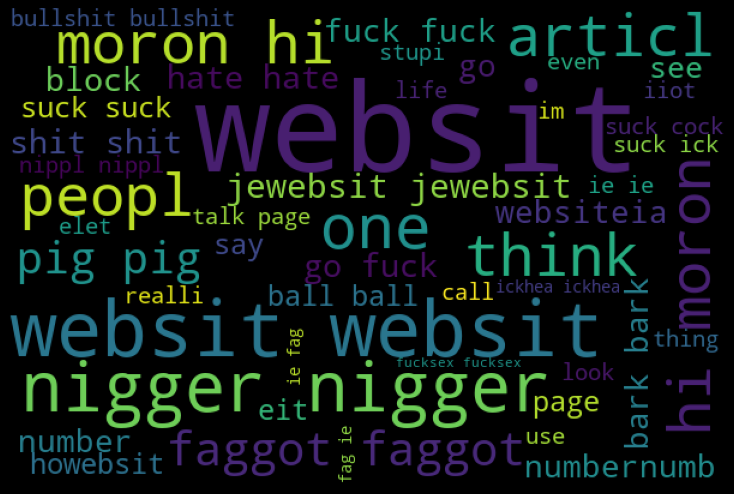

In [58]:
#In order to get an idea of what are the words that contribute the most to different labels, we generate word clouds.
#Getting words which are highly insulting and ofensive and are found more often in our dataset:
from wordcloud import WordCloud
cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(train['comment_text'][train['malignant']==1]))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

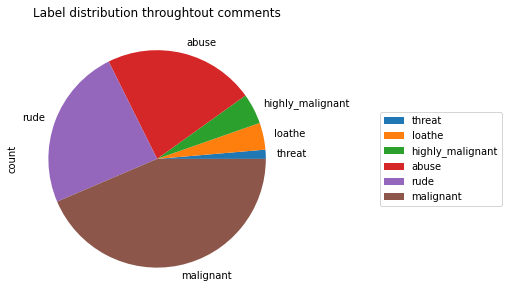

In [59]:
#Target label distribution over and in the comments:
columns_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_dist= train[columns_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_dist.plot.pie(y='count',title='Label distribution throughtout comments',figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

As we said previously, malignant category has the highest number of comments followed by rude and abuse which have the second and third place when comparing the list of highest number of comments in the dataset.

In [60]:
pip install xgboost

     |████████████████████████████████| 173.5 MB 25 kB/s s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [61]:
#Packages Loading for our machine learning algorithms
from nltk.stem.wordnet import WordNetLemmatizer
from timeit import default_timer as timer

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from statistics import mean
from sklearn.metrics import hamming_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

from sklearn.metrics import roc_auc_score, confusion_matrix
import statistics
from sklearn.metrics import recall_score

from wordcloud import WordCloud
from collections import Counter

from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [62]:
#  Convert text into vectors using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vector = TfidfVectorizer(max_features = 10000, stop_words='english')
x = tf_vector.fit_transform(train['comment_text'])

In [64]:
#training and testing shape:
print(train.shape)
print(test.shape)

(159571, 10)
(153164, 2)


In [67]:
#train and test split
from sklearn.model_selection import train_test_split, GridSearchCV
y=train['bad']
#Transforming the data to remove the skewness:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.25)

In [68]:
print(y_train.shape)
y_test.shape

(119678,)


(39893,)

In [69]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix,classification_report
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9585387456341182
Test accuracy is 0.9562579901235806
[[35644   205]
 [ 1540  2504]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     35849
           1       0.92      0.62      0.74      4044

    accuracy                           0.96     39893
   macro avg       0.94      0.81      0.86     39893
weighted avg       0.96      0.96      0.95     39893



In [70]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9987215695449456
Test accuracy is 0.9389867896623468
[[34680  1169]
 [ 1265  2779]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     35849
           1       0.70      0.69      0.70      4044

    accuracy                           0.94     39893
   macro avg       0.83      0.83      0.83     39893
weighted avg       0.94      0.94      0.94     39893



In [71]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9987048580357292
Test accuracy is 0.9560073195798762
[[35475   374]
 [ 1381  2663]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     35849
           1       0.88      0.66      0.75      4044

    accuracy                           0.96     39893
   macro avg       0.92      0.82      0.86     39893
weighted avg       0.95      0.96      0.95     39893



In [72]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9501495680074867
Test accuracy is 0.9503421652921565
[[35517   332]
 [ 1649  2395]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     35849
           1       0.88      0.59      0.71      4044

    accuracy                           0.95     39893
   macro avg       0.92      0.79      0.84     39893
weighted avg       0.95      0.95      0.95     39893



In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9238707197647019
Test accuracy is 0.9199859624495526
[[35698   151]
 [ 3041  1003]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     35849
           1       0.87      0.25      0.39      4044

    accuracy                           0.92     39893
   macro avg       0.90      0.62      0.67     39893
weighted avg       0.92      0.92      0.90     39893



In [75]:
# RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))

Training accuracy is 0.9986965022811211
Test accuracy is 0.9559822525255057


In [69]:
from sklearn.metrics import hamming_loss       #we will evaluate our ML with log loss, hamming_loss, Recall and Precision.
from sklearn.metrics import log_loss

def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print("Log_loss : {}".format(loss))

In [70]:
# calculate results
evaluate_score(y_test,y_pred_train[0:39893])

Hamming_loss : 17.486777128819593
Log_loss : 6.039788502543476


In [76]:
#cross validation of Random forest
cvs=cross_val_score(RF, x, y, cv=2, scoring='accuracy')

In [77]:
#mwan of cross validation:
cvmean=cvs.mean()
print('cross validation score :',cvmean*100)

cross validation score : 95.44152747001438


In [78]:
#confusion matrix and classification report:
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

[[35466   383]
 [ 1373  2671]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     35849
           1       0.87      0.66      0.75      4044

    accuracy                           0.96     39893
   macro avg       0.92      0.82      0.86     39893
weighted avg       0.95      0.96      0.95     39893



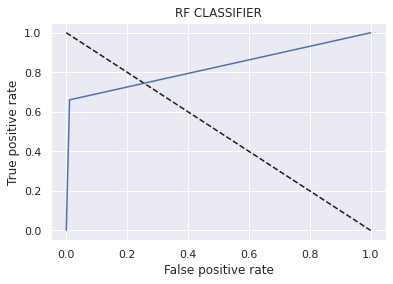

In [79]:
#Plotting the graph of AUC
# model is performing good :
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()
#more the area under curve, more will be the better prediction

In [80]:
!pip install eli5

     |████████████████████████████████| 106 kB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 6.8 MB/s  eta 0:00:01


In [81]:
import eli5
eli5.show_weights(RF,vec = tf_vector, top = 15)  #random forest
# top 15 words  which makes a comment malignent

Weight,Feature
0.1082 ± 0.0838,fuck
0.0275 ± 0.0286,shit
0.0226 ± 0.0202,suck
0.0208 ± 0.0126,iiot
0.0191 ± 0.0144,stupi
0.0177 ± 0.0191,bitch
0.0169 ± 0.0148,asshol
0.0129 ± 0.0113,faggot
0.0120 ± 0.0122,cunt
0.0119 ± 0.0127,ick


In [82]:
#fit the test dataset
test_data =tf_vector.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [83]:
#Random Forest prediciton:
prediction=RF.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
#importing joblib for algorithm saving:
import joblib
joblib.dump(RF,"malig.pkl")

['malig.pkl']

Splitting dataset into training and testing
Since the system was going out of memory using train_test_split, I had jumbled all the indexes in the beginning itself.
The shuffle function defined here performs the task of assigning first 2/3rd values to train and remaining 1/3rd values to the test set.

In [73]:
#split train and test data
from sklearn.model_selection import train_test_split, GridSearchCV
def shuffle(matrix, target, test_proportion):
    ratio = int(matrix.shape[0]/test_proportion)
    X_train = matrix[ratio:,:]
    X_test =  matrix[:ratio,:]
    Y_train = target[ratio:,:]
    Y_test =  target[:ratio,:]
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = shuffle(tf, labels,3)

#X shape in train and test dataset:
print(X_test.shape)
print(X_train.shape)

(53190, 182499)
(106381, 182499)


In [69]:
#Y shape in train and test dataset:
print(Y_test.shape)
print(Y_train.shape)

(53190, 6)
(62703, 6)


Implementation :
Let us define all the evaluation metrics

In [70]:
from sklearn.metrics import hamming_loss       #log loss, Recall and Precision. No olvides estos 3 ultimos
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(Y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print("Log_loss : {}".format(loss))

 Using Binary Relevance (BR) Method with MultinomialNB classifiers (from scratch)

In [89]:
from sklearn.naive_bayes import MultinomialNB


In [90]:
# clf will be the list of the classifiers for all the 6 labels
# each classifier is fit with the training data and corresponding classifier
clf = []
for ix in range(6):
    clf.append(MultinomialNB())
    clf[ix].fit(X_train[0:62703],Y_train[:,ix])

In [91]:
# predict list contains the predictions, it is transposed later to get the proper shape #rephrase this code 
predict = []
for ix in range(6):
    predict.append(clf[ix].predict(X_test))

predict = np.asarray(np.transpose(predict))
print(predict.shape)

(53190, 6)


In [92]:
# calculate results
evaluate_score(Y_test,predict)

Hamming_loss : 4.318480917465689
Accuracy : 88.37187441248355
Log_loss : 0.4348795877773597


2. BR Method with SVM classifier (from scikit-multilearn)


In [184]:
pip install scikit-multilearn

     |████████████████████████████████| 89 kB 6.5 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


3. BR Method with Multinomial classifier (from scikit-multilearn)


In [73]:
#create and fit classifier
from skmultilearn.problem_transform import BinaryRelevance
classifier = BinaryRelevance(classifier = MultinomialNB(), require_dense = [False, True])
classifier.fit(X_train[0:62703], Y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[False, True])

In [74]:
#predictions
predictions = classifier.predict(X_test)

In [75]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 4.326941154352322
Accuracy : 88.29855235946607
Log_loss : 0.42693128498161154


Among the results obtained till now, we see the RF has got the best ones taking into account the acurracy, log loss, recall, precision and f1score.

Trying again if we find better results:

In [165]:
data_raw=pd.read_csv('train.csv')

In [166]:
#1. EDA
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 159571
Number of columns in data = 8


**Sample data:**


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [167]:
#1.1. Checking for missing values
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64


In [168]:
#1.2. Calculating number of comments under each label
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [169]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']


In [173]:
#2. Data Pre-Processing
from wordcloud import WordCloud,STOPWORDS
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
print(data.shape)
#(2000, 8)
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
#2.1. Cleaning Data
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

(2000, 8)


In [174]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
68185,b66a2c43f433a2c4,well that reversion took all of minutes and ...,0,0,0,0,0,0
3355,090e00bcb23c2cc1,curious as to why you want to be a busybody wi...,0,0,0,0,0,0
98796,107d14f999b4b011,wiki fags like neiln perfect screen name hes p...,1,0,0,0,0,0
62163,a64c09d3c32c0b0e,june utc if someone threatens you to start s...,0,0,0,0,0,0
3533,09819be9d13018bd,if that is true then delete this portion on ja...,0,0,0,0,0,0


In [175]:
#2.2. Removing Stop Words
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
68185,b66a2c43f433a2c4,well reversion took minutes stated reas...,0,0,0,0,0,0
3355,090e00bcb23c2cc1,curious want busybody curious w...,0,0,0,0,0,0
98796,107d14f999b4b011,wiki fags like neiln perfect screen name hes p...,1,0,0,0,0,0
62163,a64c09d3c32c0b0e,june utc someone threatens start speedy d...,0,0,0,0,0,0
3533,09819be9d13018bd,true delete portion january bush s...,0,0,0,0,0,0


In [176]:
#2.3. Stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
68185,b66a2c43f433a2c4,well revers took minut state reason consid sec...,0,0,0,0,0,0
3355,090e00bcb23c2cc1,curious want busybodi curious want busybodi iv...,0,0,0,0,0,0
98796,107d14f999b4b011,wiki fag like neiln perfect screen name hes pr...,1,0,0,0,0,0
62163,a64c09d3c32c0b0e,june utc someon threaten start speedi delet pr...,0,0,0,0,0,0
3533,09819be9d13018bd,true delet portion januari bush son present co...,0,0,0,0,0,0


In [177]:
#2.4. Train-Test Split
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 8)
(600, 8)


In [178]:
train_text = train['comment_text']
test_text = test['comment_text']

In [179]:
#2.5. TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)
#TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

In [180]:
#3. Multi-Label Classification
#3.1. Multiple Binary Classifications - (One Vs Rest Classifier)
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction1 = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction1)))
    print("\n")

UsageError: Line magic function `%%time` not found.


In [185]:
#3.2. Multiple Binary Classifications - (Binary Relevance)
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions2 = classifier.predict(x_test)

# accuracy
print("Accuracy Binary Relevance= ",accuracy_score(y_test,predictions2))
print("\n")

UsageError: Line magic function `%%time` not found.


In [186]:
#3.3. Classifier Chains
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions3 = classifier.predict(x_test)

# accuracy
print("Accuracy Classifier Chains= ",accuracy_score(y_test,predictions3))
print("\n")

UsageError: Line magic function `%%time` not found.


In [187]:
#3.4. Label Powerset
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions4 = classifier.predict(x_test)

# accuracy
print("Accuracy of Label Powerset= ",accuracy_score(y_test,predictions4))
print("\n")

UsageError: Line magic function `%%time` not found.


In [188]:
#3.5. Adapted Algorithm
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new5 = classifier_new.predict(x_test)

# accuracy
print("Accuracy of Adapted Algorithm= ",accuracy_score(y_test,predictions_new5))
print("\n")

UsageError: Line magic function `%%time` not found.


In [197]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
classifier=BinaryRelevance(GaussianNB())
classifier.fit(x_train,y_train)

#BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
#saving LogisticRegression model
BinaryRelevance_model=BinaryRelevance(GaussianNB())
BinaryRelevance_model.fit(x_train,y_train)

predc=BinaryRelevance_model.predict(x_test)

#Library for saving data
import pickle
filename='finalized_model.pickle'
pickle.dump(BinaryRelevance_model,open(filename,'wb'))

In [205]:
#Conclusion
import pickle
loaded_model=pickle.load(open('finalized_model.pickle','rb'))
result_v2=loaded_model.score(x_test,y_test)
print("Accuracy Score :",result_v2*100)


Accuracy Score : 87.33333333333333


Found no better results, we will finally select RF algorithm as the best Algorithm for this study case.


https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/code